In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
customers = pd.read_csv(r"C:\Users\khira\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\khira\Downloads\Transactions.csv")

In [13]:
transactions_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',  # Total products purchased
}).reset_index()

customer_data = customers.merge(transactions_summary, on='CustomerID', how='left').fillna(0)

In [14]:
features = customer_data[['TotalValue', 'Quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
customer_data['Cluster'] = cluster_labels

C:\Users\khira\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khira\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
db_index = davies_bouldin_score(scaled_features, cluster_labels)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

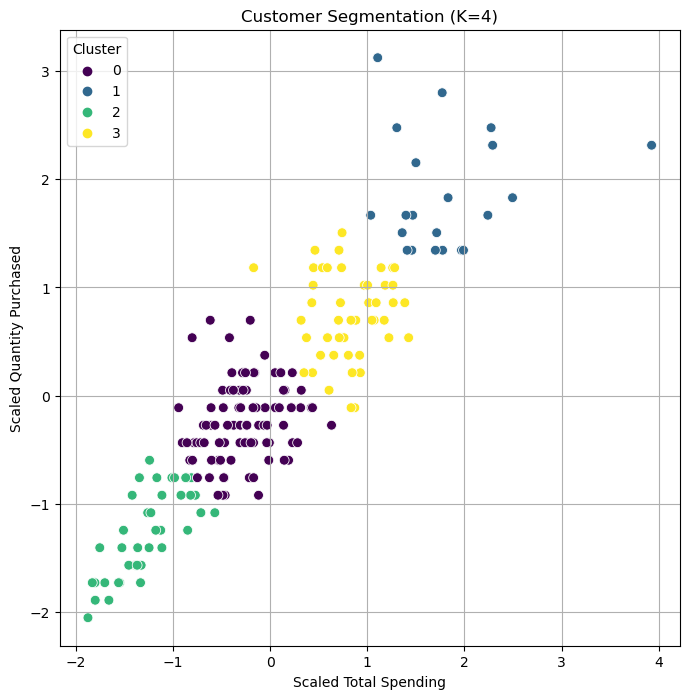

In [19]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_data['Cluster'], 
    palette='viridis', 
    s=50
)
plt.title(f'Customer Segmentation (K={k})')
plt.xlabel('Scaled Total Spending')
plt.ylabel('Scaled Quantity Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [20]:
print(f"Number of Clusters: {k}")
print(f"DB Index: {db_index:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")



Number of Clusters: 4
DB Index: 0.71
Silhouette Score: 0.45


In [21]:
customer_data.to_csv("FirstName_LastName_Clustering.csv", index=False)

print("Clustering completed with K=4. Results saved to 'FirstName_LastName_Clustering.csv'.")


Clustering completed with K=4. Results saved to 'FirstName_LastName_Clustering.csv'.
